In [15]:
import pandas as pd # untuk melakukan processing dan analysis data 
import numpy as np # library python yg berfokus pada scientific computing
import matplotlib.pyplot as plt #untuk visualisasi data

base_dir = "china_gdp.csv" # deklarasi file dataset kita
df = pd.read_csv(base_dir) # untuk membaca file dataset

df.head() # menampilkan 5 baris data pertama pada dataset kita

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


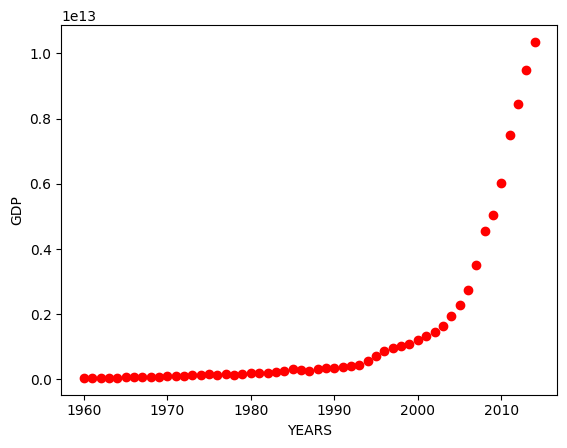

In [16]:
# Plotting dataset
x_data,y_data =(df["Year"].values,df["Value"].values)
plt.plot(x_data,y_data,"ro")
plt.ylabel("GDP")
plt.xlabel("YEARS")
plt.show()

In [17]:
# membuat model
def model_sigmoid(x,beta_1,beta_2):
    return 1/(1+np.exp(-beta_1* (x-beta_2)))

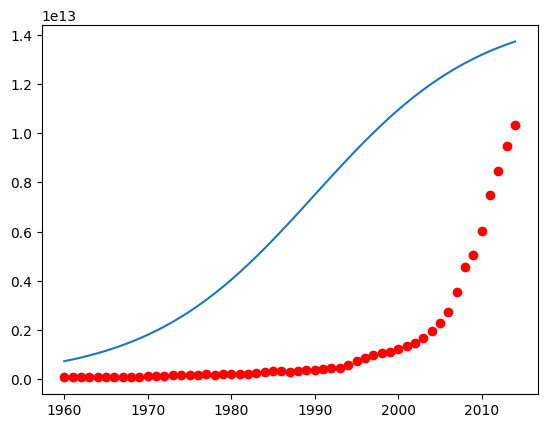

In [18]:
# testing model
beta_1 = 0.1
beta_2 = 1990.0

# logistic function
y_prediksi = model_sigmoid(x_data,beta_1,beta_2)

# plot initial predictions against datapoint
plt.plot(x_data,y_data,"ro")
plt.plot(x_data,y_prediksi*15000000000000.)

In [19]:
# normalisasi data x dan y
x_data_scaled = (x_data-min(x_data))/(max(x_data)-min(x_data))
y_data_scaled = (y_data-min(y_data))/(max(y_data)-min(y_data))

In [20]:
# Menentukan nilai beta_1 dan beta_2
from scipy.optimize import curve_fit
popt,pcov= curve_fit(model_sigmoid,x_data_scaled,y_data_scaled)

print(f"beta_1 {popt[0]}")
print(f"beta_2 {popt[1]}")

beta_1 18.869350330725496
beta_2 0.8966631946086254


In [21]:
# Hitung y_prediksi
y_prediksi = model_sigmoid(x_data_scaled, *popt)
y_prediksi

array([4.48719934e-08, 6.36402568e-08, 9.02585768e-08, 1.28010335e-07,
       1.81552227e-07, 2.57488665e-07, 3.65186435e-07, 5.17930087e-07,
       7.34560575e-07, 1.04179927e-06, 1.47754403e-06, 2.09554374e-06,
       2.97202816e-06, 4.21511035e-06, 5.97812170e-06, 8.47852363e-06,
       1.20247281e-05, 1.70541331e-05, 2.41870621e-05, 3.43032521e-05,
       4.86503124e-05, 6.89975015e-05, 9.78537336e-05, 1.38776585e-04,
       1.96810179e-04, 2.79105488e-04, 3.95798596e-04, 5.61253326e-04,
       7.95817632e-04, 1.12830261e-03, 1.59947425e-03, 2.26695749e-03,
       3.21209477e-03, 4.54948080e-03, 6.44010254e-03, 9.10921779e-03,
       1.28702244e-02, 1.81556204e-02, 2.55553699e-02, 3.58609067e-02,
       5.01085812e-02, 6.96082271e-02, 9.59297791e-02, 1.30805189e-01,
       1.75892821e-01, 2.32367071e-01, 3.00364883e-01, 3.78450913e-01,
       4.63391602e-01, 5.50511188e-01, 6.34638606e-01, 7.11278427e-01,
       7.77478723e-01, 8.32083501e-01, 8.75435561e-01])

TUGAS 2

1. Tambahkan evaluasi model dengan menghitung nilai MAE, MSE, RMSE

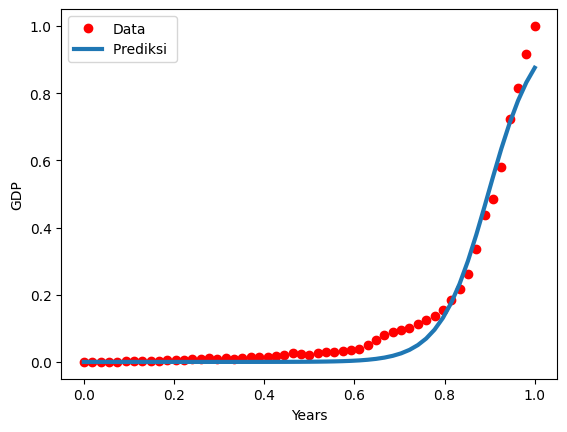

In [22]:
# Plot Hasil Regresi Non Linier
plt.plot(x_data_scaled,y_data_scaled,'ro', label='Data')
plt.plot(x_data_scaled,y_prediksi,linewidth=3.0,label= 'Prediksi ')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Years')
plt.show()

In [23]:
# Evaluasi akurasi model regresi
# menentukan data latih dan data uji secara acak (split test)

i = np.random.rand(len(df)) < 0.8
x_latih = x_data_scaled[i]
y_latih = y_data_scaled[i]

x_uji = x_data_scaled [~i]
y_uji = y_data_scaled [~i]

In [24]:
# Menentukan nilai beta_1 dan beta_2
from scipy.optimize import curve_fit
popt_latih,pcov= curve_fit(model_sigmoid,x_latih,y_latih)
popt_latih

print(f"beta_1 {popt_latih[0]}")
print(f"beta_2 {popt_latih[1]}")

beta_1 19.035868254549463
beta_2 0.8946616658227527


In [25]:
# Hitung y_prediksi
y_latih = model_sigmoid(x_uji, *popt_latih)
y_latih

array([6.73664485e-07, 2.75947140e-06, 3.92573680e-06, 1.60804816e-05,
       2.23190998e-03, 3.17221771e-03, 5.60360747e-01])

In [26]:
# Menghitung MAE, MSE, RMSE
mae = np.mean(np.absolute(y_uji - y_latih))
mse = np.mean((y_uji - y_latih)**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error = " + str(round(mae,4)))
print("Mean Squared Error = " + str(round(mse,4)))
print("Root Mean Squared Error = " + str(round(rmse,4)))

Mean Absolute Error = 0.0239
Mean Squared Error = 0.0011
Root Mean Squared Error = 0.0334


2. Tambahkan grafik yang menjukkan hubungan antara "Year" dan "GDP" dengan nilai yang sebenarnya (tidak dinormalisasi)

In [27]:

# Inverse data dari data prediksi (y_prediksi)
y_prediksi_inverse = y_prediksi * (max(y_data)-min(y_data)+min(y_data))
y_prediksi_inverse

array([4.64641941e+05, 6.58984151e+05, 9.34612374e+05, 1.32552548e+06,
       1.87994276e+06, 2.66625180e+06, 3.78144409e+06, 5.36307890e+06,
       7.60625115e+06, 1.07876562e+07, 1.52997198e+07, 2.16990029e+07,
       3.07748515e+07, 4.36467584e+07, 6.19024443e+07, 8.77936855e+07,
       1.24514036e+08, 1.76592679e+08, 2.50452958e+08, 3.55204403e+08,
       5.03765798e+08, 7.14457518e+08, 1.01325895e+09, 1.43700818e+09,
       2.03793629e+09, 2.89009036e+09, 4.09842786e+09, 5.81168375e+09,
       8.24055767e+09, 1.16833836e+10, 1.65622867e+10, 2.34739633e+10,
       3.32607008e+10, 4.71091081e+10, 6.66861781e+10, 9.43244174e+10,
       1.33269008e+11, 1.87998394e+11, 2.64621555e+11, 3.71333654e+11,
       5.18865927e+11, 7.20781479e+11, 9.93336720e+11, 1.35446573e+12,
       1.82134057e+12, 2.40612192e+12, 3.11022782e+12, 3.91879553e+12,
       4.79834207e+12, 5.70045072e+12, 6.57157598e+12, 7.36516842e+12,
       8.05066135e+12, 8.61608463e+12, 9.06498792e+12])

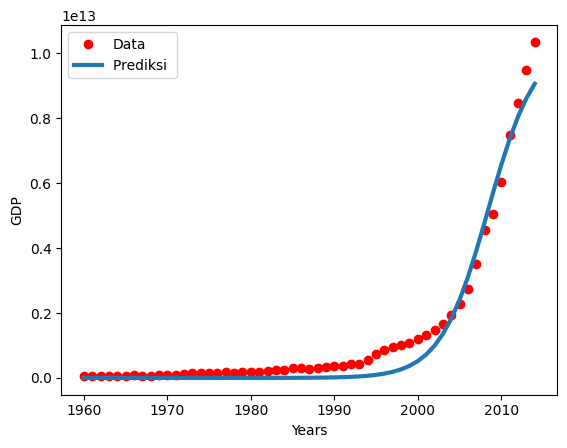

In [28]:
# ploting data sebenarnya (tidak dinormalisasi)
plt.plot(x_data,y_data,'ro', label='Data')
plt.plot(x_data,y_prediksi_inverse,linewidth=3.0,label= 'Prediksi ')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Years')
plt.show()

3. Tambahkan grafik yang menunjukkan prediksi GDP untuk tahun 2015 - 2030 menggunakan nilai yang sebenarnya (tidak dinormalisasi)

In [29]:
# set data array tahun 2015 sampai 2030
x_tahun = np.array(range(2015, 2031))
x_tahun

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030])

In [30]:
# normalisasi data dari data array tahun 2015 sampai 2030 yang dibuat sebelumnya
x_tahun_scalled = (x_tahun-min(x_data))/(max(x_data)-min(x_data))
x_tahun_scalled

array([1.01851852, 1.03703704, 1.05555556, 1.07407407, 1.09259259,
       1.11111111, 1.12962963, 1.14814815, 1.16666667, 1.18518519,
       1.2037037 , 1.22222222, 1.24074074, 1.25925926, 1.27777778,
       1.2962963 ])

In [31]:
# Hitung prediksi
y_nilai_prediksi = model_sigmoid(x_tahun_scalled, *popt)
y_nilai_prediksi

array([0.9088216 , 0.93393472, 0.95249254, 0.96602708, 0.97580367,
       0.98281684, 0.98782265, 0.99138295, 0.99390874, 0.99569739,
       0.99696243, 0.99785632, 0.99848756, 0.99893312, 0.99924752,
       0.99946932])

In [32]:
# Inverse data dari data prediksi (y_nilai_scalled)
y_nilai_inverse = y_nilai_prediksi * (max(y_data)-min(y_data)+min(y_data))
y_nilai_inverse

array([9.41069475e+12, 9.67073688e+12, 9.86290002e+12, 1.00030478e+13,
       1.01042828e+13, 1.01769030e+13, 1.02287373e+13, 1.02656036e+13,
       1.02917577e+13, 1.03102790e+13, 1.03233782e+13, 1.03326343e+13,
       1.03391707e+13, 1.03437844e+13, 1.03470399e+13, 1.03493366e+13])

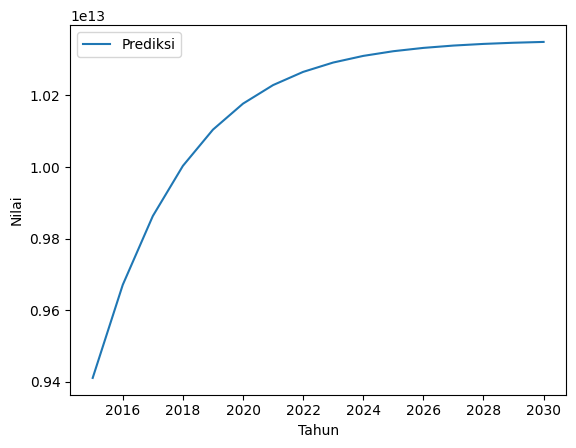

In [33]:
# ploting data sebenarnya (prediksi GDP untuk tahun 2015 - 2030 )
plt.plot(x_tahun, y_nilai_inverse, '-', label='Prediksi')

plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend()
plt.show()